In [1]:
# CELL1

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import PandasTools
from rdkit.Chem import Lipinski
import numpy as np
import pandas as pd

In [2]:
# CELL 2

df = pd.read_csv('https://raw.githubusercontent.com/GLambard/Molecules_Dataset_Collection/master/originals/ESOL_delaney-processed.csv')
df.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles,structure
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2,
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O),
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1,

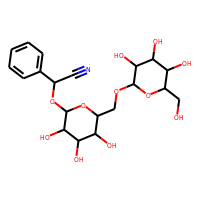
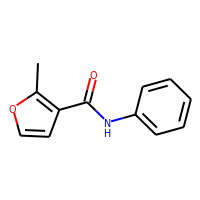
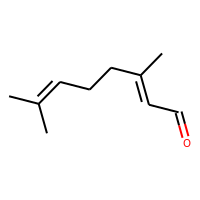
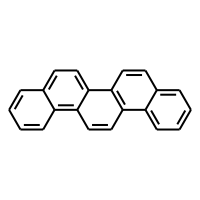
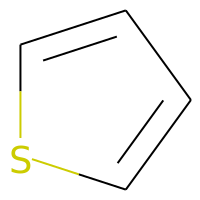

In [4]:
# CELL 3

PandasTools.AddMoleculeColumnToFrame(df, 'smiles', 'structure')
df.head()

In [159]:
# CELL 4

# create a new dataframe using only structure and id columns
ndf = df[['structure','Compound ID']]

# drop rows that contain NaNs
ndf = ndf.dropna(axis=0).reset_index(drop=True)

# calculate required descriptors
ndf['HDonors'] = [Lipinski.NumHDonors(mol) for mol in ndf.structure]
ndf['HAcceptors'] = [Lipinski.NumHAcceptors(mol) for mol in ndf.structure]
ndf['MolWeight'] = [Descriptors.MolWt(mol) for mol in ndf.structure]
ndf['LogP'] = [Descriptors.MolLogP(mol) for mol in ndf.structure]

# create a Lipinski rule check column and name it target
ndf['target'] = [int(int(row.HDonors<=5) + int(row.HAcceptors<=10) + int(row.MolWeight<=500) + int(row.LogP<=5) >= 3) for index, row in ndf.iterrows()]

In [6]:
ndf.columns

Index(['structure', 'Compound ID', 'HDonors', 'HAcceptors', 'MolWeight',
       'LogP', 'target'],
      dtype='object')

,structure,Compound ID,HDonors,HAcceptors,MolWeight,LogP,target
0,,Amigdalin,7,12,457.432,-3.10802,0
219,,"Etoposide (148-167,25mg/ml)",3,13,588.562,1.33860,0
272,,Deltamethrin,0,4,505.206,6.49018,0
298,,Raffinose,11,16,504.438,-7.57140,0
441,,Lactose,8,11,342.297,-5.39720,0
482,,Fluvalinate,1,5,502.920,7.39568,0
555,,"Digoxin (L1=41,8mg/mL, L2=68,2mg/mL, Z=40,1mg/mL)",6,14,780.949,2.21810,0
640,,Digitoxin,5,13,764.950,3.24730,0
939,,bromadiolone,2,4,527.414,7.18370,0
988,,Mirex,0,0,545.546,6.22300,0

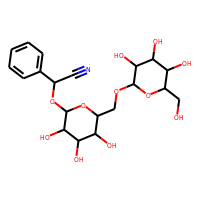
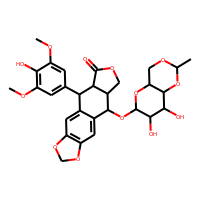
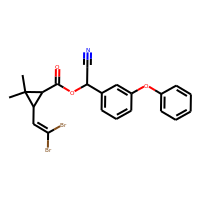
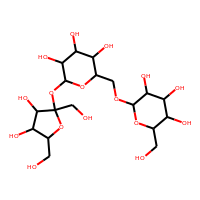
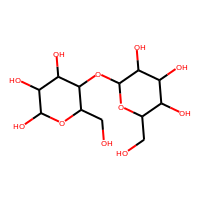
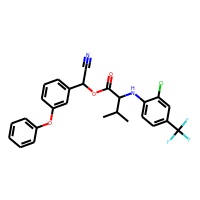
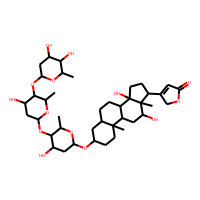
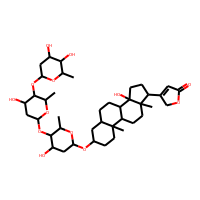
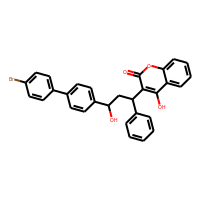
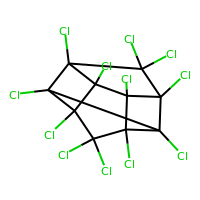
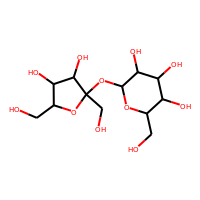
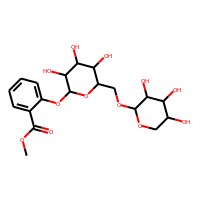

In [7]:
ndf[ndf.target==False]

,structure,Compound ID,HDonors,HAcceptors,MolWeight,LogP,target,ECFP
0,,Amigdalin,7,12,457.432,-3.10802,0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,,Fenfuram,1,2,201.225,2.84032,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,,citral,0,1,152.237,2.87800,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,,Picene,0,0,278.354,6.29940,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,,Thiophene,0,1,84.143,1.74810,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."

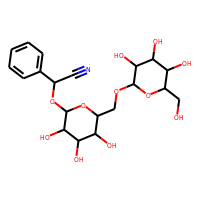
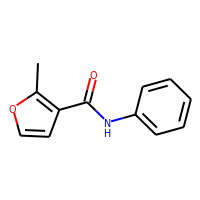
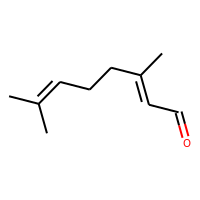
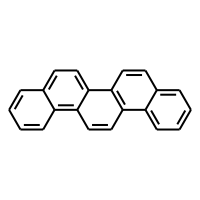
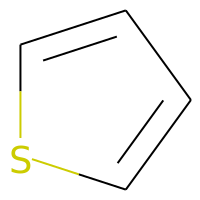

In [160]:
ndf['ECFP'] = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048) for mol in ndf.structure]
ndf.head()

In [161]:
ndf.ECFP

0       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...
                              ...                        
1123    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1124    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1125    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1126    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1127    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: ECFP, Length: 1128, dtype: object

In [152]:
# CELL 4s
# create a function to convert descriptors to numpy arrays
# credits to iwatobipen
def bit2array(bit):
    array = np.zeros((0,), dtype=int)
    DataStructs.ConvertToNumpyArray(bit, array)
    return array

X = [bit2array(desc) for desc in ndf['ECFP']]
X = np.array(X)
X[:10]

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [154]:
X.shape

(1128, 2048)

In [155]:
# CELL 5

# imports
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# data preparation
#X = np.array(ndf['ECFP'])
y = np.array(ndf['target'])

# train and test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
# CELL 6

# instantiate the model
NB = MultinomialNB()

# train the model on train subset
NB.fit(X_train, y_train)

MultinomialNB()

In [158]:
# CELL 7

# run a prediction
y_pred = NB.predict(X_test)

# and obtain prediction performance score
f1_score(y_test, y_pred)

0.9910313901345291